### Functions

In [2]:
def find_not_matching(list1, list2):
    ''' Takes two lists and finds any strings that don't match in each of them.
    Returns the list not matching from first list, list not matching from second list, 
    and entire list of all not matching.'''
    
    # Find elements that are in list1 but not in list2
    not_matching_in_list2 = set(list1) - set(list2)

    # Find elements that are in list2 but not in list1
    not_matching_in_list1 = set(list2) - set(list1)

    # Combine both sets of non-matching elements
    all_not_matching = not_matching_in_list1.union(not_matching_in_list2)

    return not_matching_in_list2, not_matching_in_list1, all_not_matching

In [3]:
def string_parsing(list):
    ''' Standardizes parsing of strings. Removes hyphens, replaces spaces with underscores. 
    Strips whitespace from front and end of string. '''
    
    # Variable to return later
    arr = []

    # Loop over all elements. Strip whitespace on left and right, replace hyphen with '', replace spaces with '_'
    for i in range(len(list)):
        temp = list[i]
        if temp is not None and type(temp) is not int and str(temp) != 'nan' and type(temp) is not int and type(temp) is not float:
            temp = temp.lstrip()
            temp = temp.rstrip()
            temp = temp.lower().replace('-', ' ').replace(' ', '_').replace('__', '_')
        arr.append(temp)

    return arr

In [4]:
def string_parsing_word(word):
    ''' Standardizes parsing of a single strings Removes hyphens, replaces spaces with underscores. 
    Strips whitespace from front and end of string. '''
    
    if word is not None and str(word) != 'nan' and type(word) is not int:
        word = word.lstrip()
        word = word.rstrip()
        word = word.lower().replace('-', ' ').replace(' ', '_').replace('__', '_')
    
    return word

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import graphviz
from IPython.display import Image
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from math import sqrt



# Disable pandas warning
pd.options.mode.chained_assignment = None

# Display max rows / columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Add disease rate information to original dataset

In [6]:
# Clean original dataset creating consistent naming for diseases and symptoms
df = pd.read_csv('dataset.csv')

# Standardize text formatting
df = df.apply(string_parsing)

# Setup columns to be symptoms
symptoms = []

for cols in df.columns:
    if cols != 'Disease':
        symptoms.append(df[cols].unique().tolist())
    
symptom_list = sum(symptoms, [])
unique_symptoms = set(symptom_list)
unique_symptoms = [x for x in unique_symptoms if str(x) != 'nan']
unique_symptoms = string_parsing(unique_symptoms)

cleaned_df = pd.DataFrame(columns=unique_symptoms)

cleaned_df['Disease'] = df['Disease'].copy()

for index,row in df.iloc[1:].iterrows():
    for col in df.columns[1:]:
        value = row[col]
        if(str(value) != 'nan'):
            cleaned_df[value][index] = 1

cleaned_df = cleaned_df.fillna(0)

In [7]:
cleaned_df.head()

,high_fever,anxiety,yellowish_skin,mild_fever,yellowing_of_eyes,puffy_face_and_eyes,malaise,continuous_sneezing,cold_hands_and_feets,receiving_blood_transfusion,receiving_unsterile_injections,brittle_nails,sunken_eyes,cramps,excessive_hunger,headache,back_pain,cough,knee_pain,muscle_pain,mucoid_sputum,pain_behind_the_eyes,neck_pain,acute_liver_failure,spinning_movements,blackheads,inflammatory_nails,visual_disturbances,skin_peeling,belly_pain,muscle_weakness,nausea,continuous_feel_of_urine,movement_stiffness,extra_marital_contacts,polyuria,swollen_blood_vessels,redness_of_eyes,pain_during_bowel_movements,hip_joint_pain,muscle_wasting,throat_irritation,vomiting,mood_swings,constipation,loss_of_balance,unsteadiness,chills,dischromic_patches,loss_of_smell,fluid_overload,irritation_in_anus,swollen_legs,joint_pain,yellow_crust_ooze,yellow_urine,dizziness,obesity,family_history,altered_sensorium,swollen_extremeties,bladder_discomfort,weight_loss,spotting_urination,swelling_of_stomach,bloody_stool,prominent_veins_on_calf,fast_heart_rate,history_of_alcohol_consumption,acidity,diarrhoea,slurred_speech,breathlessness,sinus_pressure,red_sore_around_nose,pus_filled_pimples,indigestion,runny_nose,scurring,abnormal_menstruation,stomach_pain,irregular_sugar_level,small_dents_in_nails,nodal_skin_eruptions,skin_rash,bruising,itching,sweating,blood_in_sputum,increased_appetite,irritability,patches_in_throat,silver_like_dusting,drying_and_tingling_lips,watering_from_eyes,loss_of_appetite,palpitations,blurred_and_distorted_vision,congestion,depression,swelling_joints,stiff_neck,abdominal_pain,stomach_bleeding,rusty_sputum,dark_urine,weight_gain,burning_micturition,lethargy,weakness_of_one_body_side,swelled_lymph_nodes,phlegm,enlarged_thyroid,red_spots_over_body,pain_in_anal_region,painful_walking,lack_of_concentration,toxic_look_(typhos),ulcers_on_tongue,shivering,internal_itching,fatigue,weakness_in_limbs,blister,coma,chest_pain,restlessness,dehydration,foul_smell_of_urine,passage_of_gases,distention_of_abdomen,Disease
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fungal_infection


## Clean alt dataset creating consistent naming for diseases and symptoms

In [8]:
# Load up dataset with disease rate data
df_dis_rate = pd.read_csv('dataset_files/Possible_Alternates/Infectious_Disease_2001-2014/Infectious Disease 2001-2014.csv')
df_dis_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141777 entries, 0 to 141776
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Disease     141777 non-null  object 
 1   County      141777 non-null  object 
 2   Year        141777 non-null  int64  
 3   Sex         141777 non-null  object 
 4   Count       141777 non-null  int64  
 5   Population  141777 non-null  int64  
 6   Rate        141777 non-null  float64
 7   CI.lower    141777 non-null  float64
 8   CI.upper    141777 non-null  float64
 9   Unstable    141777 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 10.8+ MB


In [9]:
# Drop rows with female / male and just keep total
values_to_drop = ['Female', 'Male']
df_dis_rate_drop = df_dis_rate[~df_dis_rate['Sex'].isin(values_to_drop)]

# Standardize text formatting
df_dis_rate_drop['Disease'] = df_dis_rate_drop['Disease'].apply(string_parsing_word)

# Average the rates by disease type
df_dis_rate_avg = df_dis_rate_drop.groupby('Disease')['Rate'].mean().reset_index()

# Update name for Rate
df_dis_rate_avg['rate_mean'] = df_dis_rate_avg['Rate']
df_dis_rate_avg.drop('Rate', inplace=True, axis=1)

df_dis_rate_avg.head()

,Disease,rate_mean
0,amebiasis,0.828858
1,anaplasmosis_and_ehrlichiosis,0.016182
2,babesiosis,0.007075
3,"botulism,_foodborne",0.007012
4,"botulism,_other",0.003712


In [10]:
# Update names to match those in og
# Define strings to replace
string_replace = {'typhoid_fever,_case' : 'typhoid',
                  'hepatitis_b,_acute' : 'hepatitis_b',
                  'hepatitis_c,_acute' : 'hepatitis_c',
                  'hepatitis_e,_acute_infection' : 'hepatitis_e',
                  'hiv' : 'aids',
                  'varicella_hospitalizations': 'chicken_pox',
                  'coccidioidomycosis' : 'fungal_infection',
                  'legionellosis' : 'pneumonia'
                 }

# Replace strings in dataframe
df_dis_rate_avg = df_dis_rate_avg.replace(string_replace)

# Get rid of diseases in alt dataframe that aren't in og dataframe
df_dis_rate_cleaned = df_dis_rate_avg[df_dis_rate_avg['Disease'].isin(cleaned_df['Disease'])]

df_dis_rate_cleaned.head()

,Disease,rate_mean
11,fungal_infection,8.544240
16,dengue,0.083116
25,hepatitis_a,0.503127
26,hepatitis_b,0.231390
27,hepatitis_c,0.333212


In [11]:
# Checking matching diseases
no_match_disease_orig, no_match_disease_alt1, no_match_disease_combo = find_not_matching(cleaned_df['Disease'].unique(), 
                                                                                         df_dis_rate_cleaned['Disease'].unique())

sorted_no_match_disease_orig = sorted(no_match_disease_orig)
sorted_no_match_disease_alt1 = sorted(no_match_disease_alt1)
sorted_no_match_disease_combo = sorted(no_match_disease_combo)

# print("Elements in list1 but not in list2:", sorted_no_match_disease_orig)
# print("\n")
# print("Elements in list2 but not in list1:", sorted_no_match_disease_alt1)
# print("\n")
# print("All non-matching elements:", sorted_no_match_disease_combo)

In [12]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, high_fever to Disease
dtypes: int64(131), object(1)
memory usage: 5.0+ MB


In [13]:
# Merge the rate average data into the og dataframe
cleaned_df_merge = pd.merge(cleaned_df, df_dis_rate_cleaned, on='Disease', how='left')

cleaned_df_merge.fillna(0,inplace=True)

# cleaned_df_merge.head().iloc[:,100:110]
cleaned_df_merge['rate_mean'].head(1000)

0      8.544240
1      8.544240
2      8.544240
3      8.544240
4      8.544240
5      8.544240
6      8.544240
7      8.544240
8      8.544240
9      8.544240
10     0.000000
11     0.000000
12     0.000000
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
30     0.000000
31     0.000000
32     0.000000
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
40     0.000000
41     0.000000
42     0.000000
43     0.000000
44     0.000000
45     0.000000
46     0.000000
47     0.000000
48     0.000000
49     0.000000
50     0.000000
51     0.000000
52     0.000000
53     0.000000
54     0.000000
55     0.000000
56     0.000000
57     0.000000
58     0.000000
59     0.000000
60     6.618022
61     6.618022
62     6

In [14]:
# Save dataset to file for use in model
cleaned_df_merge.to_csv('Cleaned_original_dataset_add_disease_rate_average.csv',index=False)

In [15]:
# Create and run model on updated dataset
unique_values = cleaned_df_merge['Disease'].unique()
le = LabelEncoder()
le.fit(unique_values)
cleaned_df_merge['encoded_disease'] = le.transform(cleaned_df_merge['Disease'])

X = cleaned_df_merge.drop('Disease',axis=1)
X = X.drop('encoded_disease',axis=1)
y = cleaned_df_merge['encoded_disease']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

decision_tree_model = DecisionTreeClassifier(random_state=10,ccp_alpha=0.001)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of the Decision Tree Classifier: {accuracy*100}%')

feature_names = X.columns.tolist()
target_names = cleaned_df_merge['Disease'].unique().tolist()
export_graphviz(decision_tree_model, out_file='decision_tree_classifier_disease_rate_average.dot', 
                feature_names=feature_names, class_names=target_names, filled=True)

with open('decision_tree_classifier_disease_rate_average.dot') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph.format = 'png'
graph.render('decision_tree_disease_rate_average',view=False)

Image(filename='decision_tree_disease_rate_average.png')

Accuracy of the Decision Tree Classifier: 96.9918699186992%


In [16]:
# Run data through logistic regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_clf_pred = clf.predict(X_test)

print(f"Score for Logistic Regression:  {clf.score(X_test, y_test)*100}%")

Score for Logistic Regression:  100.0%


/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_clf_pred)}")

Confusion Matrix:
 [[28  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 22  0  0]
 [ 0  0  0 ...  0 29  0]
 [ 0  0  0 ...  0  0 30]]


/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


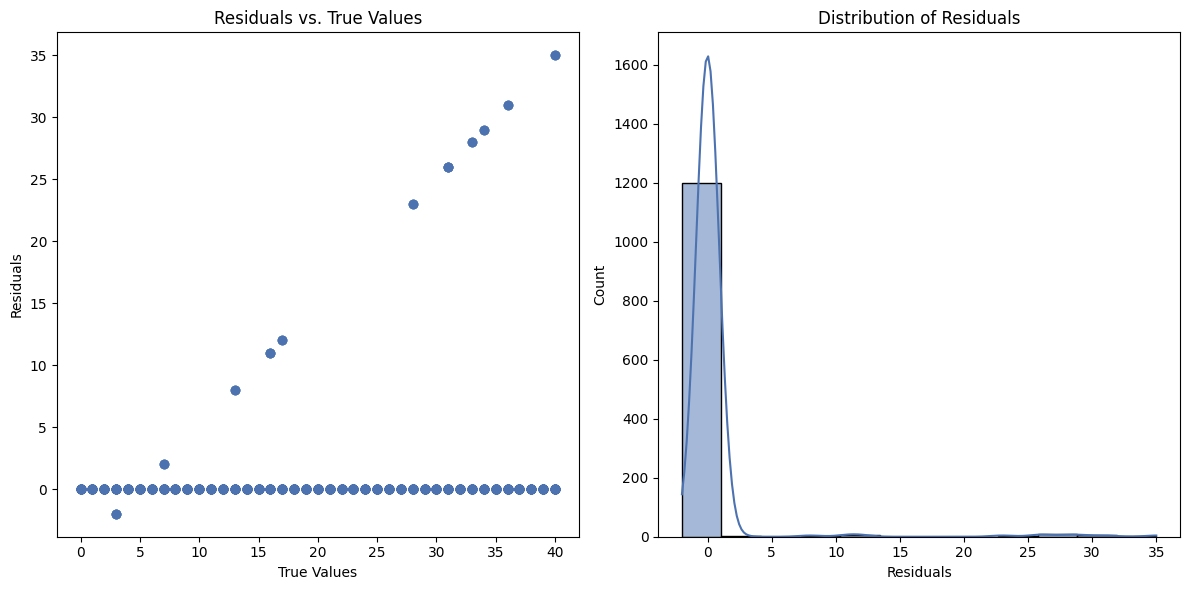

Mean Absolute Percentage Error (MAPE): 0.02%
Root Mean Squared Error (RMSE): 3.78


In [18]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/tylergraham/Desktop/CS5610/csc5610/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


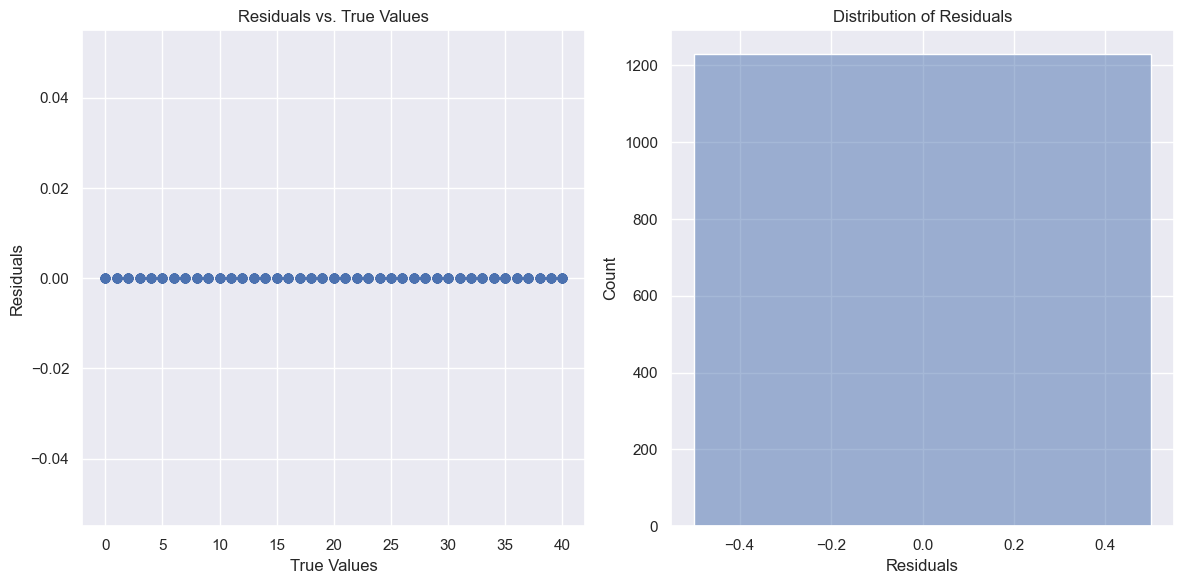

Mean Absolute Percentage Error (MAPE): 0.02%
Root Mean Squared Error (RMSE): 3.78


In [36]:
sns.set_palette("deep")
# Calculating residuals
residuals = y_test - y_clf_pred

# Plotting residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals)
plt.title('Residuals vs. True Values')
plt.xlabel('True Values')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Calculating MAPE and RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")